In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import statistics as st
from datetime import datetime

In [257]:
model_path_LSTM = "/home/aevans/nwp_bias/src/machine_learning/data/AMS_2025/20250102/CROG/CROG_fh33_t2m_GFS_ml_output_linear.parquet"

In [258]:
station = "BKLN"
fh = 3

In [259]:
full_df = pd.read_parquet(
    "/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20250102/BKLN/01_02_2025_17:20:59_full_BKLN.parquet"
)

In [260]:
lookup_path = "/home/aevans/nwp_bias/src/machine_learning/data/parent_models/HRRR/s2s/Central Lakes_t2m_HRRR_lookup_linear.csv"

lookup_path_quad = "/home/aevans/nwp_bias/src/machine_learning/data/parent_models/HRRR/s2s/Central Lakes_t2m_HRRR_lookup_quad.csv"

In [261]:
ldf = pd.read_parquet(model_path_LSTM)
# ldf = ldf.sort_index()
# ldf['Model forecast'] = ldf['Model forecast']*-1
ldf.head()

,target_error_lead_0,Model forecast,diff,valid_time
0,-0.088623,-4576.990234,998.871787,2018-02-12 15:00:00
1,-0.887447,-4576.990234,998.072962,2018-02-12 21:00:00
2,0.954996,-4576.990234,999.915406,2018-02-13 03:00:00
3,3.066732,-4576.990234,1002.027142,2018-02-13 09:00:00
4,0.371486,-4576.990234,999.331896,2018-02-13 15:00:00


In [262]:
for i in np.arange(1, 60):
    df = ldf.copy()
    df["Model forecast"] = df["Model forecast"].shift(i).fillna(0)
    df["diff"] = df.iloc[:, 0] - df.iloc[:, 1]
    mean = st.mean(abs(df["diff"]))
    mean_s = st.mean(df["diff"] ** 2)

    print("FH", i)
    print(mean, mean_s)

FH 1
14.581338189863715 63261.487106092936
FH 2
14.581636043524203 63263.01132349947
FH 3
14.581636009330289 63261.58341424043
FH 4
14.581635971948625 63258.121023867585
FH 5
14.58163592003083 63257.79493282417
FH 6
14.581758520002243 63258.35582533733
FH 7
14.581919369542888 63259.28062847865
FH 8
14.582012619645125 63259.82186063573
FH 9
14.58201257428909 63258.913660707134
FH 10
14.582358473623337 63260.90663081858
FH 11
14.582384215905439 63262.94966747416
FH 12
14.582393596854564 63263.21544223266
FH 13
14.58254445295275 63265.404199440796
FH 14
14.583336171007977 63271.166401303286
FH 15
14.583905901589057 63274.467620698895
FH 16
14.584043016845298 63277.8555932926
FH 17
14.584505995774371 63279.97482215358
FH 18
14.584671737712737 63280.733250640726
FH 19
14.584671768578893 63281.92551620706
FH 20
14.584671796056035 63282.74664457653
FH 21
14.584216877387036 63280.62588150476
FH 22
14.584157259592432 63279.10507791088
FH 23
14.583935043491387 63277.84344610556
FH 24
14.58401506

In [263]:
# ldf['Model forecast'] = ldf['Model forecast'].shift(47)

In [264]:
full_df.dropna(inplace=True)
full_df.head()

,valid_time_cos_clock,valid_time_sin_clock,valid_time_cos,valid_time_sin,t2m_BKLN,target_error,sh2_BKLN,d2m_BKLN,r2_BKLN,u10_BKLN,...,relh_WARW,srad_WARW,pres_WARW,mslp_WARW,wspd_sonic_mean_WARW,wspd_sonic_WARW,wmax_sonic_WARW,wdir_sonic_WARW,snow_depth_WARW,precip_total_WARW
0,1.000000e+00,0.000000e+00,0.999411,0.034328,6.091976,-1.129788,0.003453,-1.194376,59.489020,3.657995,...,71.680573,0.209680,999.441223,1000.459290,4.357557,3.840953,5.110470,307.336914,0.003187,0.0
1,-1.608123e-16,1.000000e+00,0.999411,0.034328,1.846576,-2.336546,0.002536,-5.353119,59.045923,1.997683,...,64.433456,0.158562,1002.427979,1003.691040,3.429064,3.260892,5.025475,305.753815,0.003355,0.0
2,-1.000000e+00,-3.216245e-16,0.999411,0.034328,0.271015,-2.712766,0.002178,-7.387833,57.159128,0.742134,...,67.167297,0.276249,1005.843018,1007.221375,1.353006,1.464957,2.895741,300.270599,0.004692,0.0
3,-1.836970e-16,-1.000000e+00,0.999411,0.034328,3.912207,0.289278,0.001819,-9.840616,36.400864,-0.874005,...,48.934978,341.757690,1005.601990,1006.780273,1.124892,1.089735,2.275084,260.809998,0.003993,0.0
4,1.000000e+00,0.000000e+00,0.998674,0.051479,3.008378,0.160819,0.002536,-5.379980,54.524680,-1.615571,...,60.596130,0.184124,1002.325989,1003.523010,4.149696,4.093899,6.512049,154.015305,0.004483,0.0


In [265]:
for k in full_df.keys():
    print(k)

valid_time_cos_clock
valid_time_sin_clock
valid_time_cos
valid_time_sin
t2m_BKLN
target_error
sh2_BKLN
d2m_BKLN
r2_BKLN
u10_BKLN
v10_BKLN
u_total_BKLN
u_dir_BKLN
tp_BKLN
prmsl_BKLN
orog_BKLN
tcc_BKLN
cape_BKLN
cin_BKLN
dswrf_BKLN
dlwrf_BKLN
gh_BKLN
valid_time
lulc_cat_BKLN
elev_cat_BKLN
slope_cat_BKLN
t2m_WANT
sh2_WANT
d2m_WANT
r2_WANT
u10_WANT
v10_WANT
u_total_WANT
u_dir_WANT
tp_WANT
prmsl_WANT
orog_WANT
tcc_WANT
cape_WANT
cin_WANT
dswrf_WANT
dlwrf_WANT
gh_WANT
lulc_cat_WANT
elev_cat_WANT
slope_cat_WANT
t2m_SUFF
sh2_SUFF
d2m_SUFF
r2_SUFF
u10_SUFF
v10_SUFF
u_total_SUFF
u_dir_SUFF
tp_SUFF
prmsl_SUFF
orog_SUFF
tcc_SUFF
cape_SUFF
cin_SUFF
dswrf_SUFF
dlwrf_SUFF
gh_SUFF
lulc_cat_SUFF
elev_cat_SUFF
slope_cat_SUFF
t2m_STON
sh2_STON
d2m_STON
r2_STON
u10_STON
v10_STON
u_total_STON
u_dir_STON
tp_STON
prmsl_STON
orog_STON
tcc_STON
cape_STON
cin_STON
dswrf_STON
dlwrf_STON
gh_STON
lulc_cat_STON
elev_cat_STON
slope_cat_STON
t2m_WARW
sh2_WARW
d2m_WARW
r2_WARW
u10_WARW
v10_WARW
u_total_WARW
u_dir_WARW

In [266]:
# ldf["valid_time"] = full_df["valid_time"]

In [267]:
def which_fold(df, fold):
    length = len(df)
    test_len = int(length * 0.2)
    df_train = pd.DataFrame()

    for n in np.arange(0, 5):
        if n != fold:
            df1 = df.iloc[int(0.2 * n * length) : int(0.2 * (n + 1) * length)]
            df_train = pd.concat([df_train, df1])
        else:
            df_test = df.iloc[int(0.2 * n * length) : int(0.2 * (n + 1) * length)]
            f = int(len(df_test) * 0.5)
            df_val = df_test.iloc[:f]
            df_test = df_test[-f:]

    return df_train["valid_time"], df_test["valid_time"], df_val["valid_time"]

In [268]:
ldf["valid_time"] = pd.to_datetime(ldf["valid_time"])

In [269]:
df_train, df_test, df_val = which_fold(ldf, 4)

In [270]:
test_set_start = df_test.iloc[0]
test_set_start

Timestamp('2023-06-26 15:00:00')

In [271]:
test_set_finish = df_test.iloc[-1]
test_set_finish

Timestamp('2023-12-31 15:00:00')

In [272]:
df_val.iloc[0]

Timestamp('2022-10-06 15:00:00')

In [273]:
df_val.iloc[-1]

Timestamp('2023-06-26 03:00:00')

In [274]:
def date_filter(ldf, time1, time2):
    ldf = ldf[ldf["valid_time"] > time1]
    ldf = ldf[ldf["valid_time"] < time2]

    return ldf

## Time filter 

In [275]:
time1 = datetime(2023, 1, 1, 0, 0, 0)
time2 = datetime(2023, 3, 30, 23, 0, 0)

ldf = date_filter(ldf, time1, time2)
full_df = date_filter(full_df, time1, time2)

In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def create_heatmap(df, x_column="target_error_lead_0", y_column="Model forecast"):
    # Round values
    df[x_column] = np.round(df[x_column] / 1.0) * 1.0
    df[y_column] = np.round(df[y_column] / 1.0) * 1.0

    # Pivot the DataFrame to create a matrix suitable for the heatmap
    heatmap_data = pd.pivot_table(
        df, index=y_column, columns=x_column, aggfunc="size", fill_value=0
    )

    # Calculate percentages
    total = heatmap_data.sum()
    heatmap_data_percent = (heatmap_data / total) * 100

    # Create the heatmap using seaborn
    plt.figure(figsize=(16, 12))
    sns.heatmap(
        heatmap_data_percent,
        vmax=100,
        cmap="Reds",
        annot=True,
        fmt=".1f",  # Format as percentage with one decimal place
        cbar_kws={"label": "Percentage (%)"},  # Add color bar label
    )

    # Set the labels and title
    plt.xlabel("Target")
    plt.ylabel("LSTM")
    plt.title("Heatmap of Target vs LSTM")

    # Show the heatmap
    plt.show()

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde


def create_scatterplot(df, x_column="target_error_lead_0", y_column="Model forecast"):
    # Calculate point density
    xy = np.vstack([df[x_column], df[y_column]])
    z = gaussian_kde(xy)(xy)

    plt.figure(figsize=(8, 8))

    # Create the scatterplot
    scatter = plt.scatter(
        df[x_column],
        df[y_column],
        c=z,
        cmap="YlOrRd",
        s=100,
        edgecolor="black",
        alpha=0.3,
    )

    # Add color bar with label
    cbar = plt.colorbar(scatter)
    cbar.set_label("Point Density")

    # Set labels and title
    plt.xlabel("Target", fontsize=18)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.ylabel("LSTM", fontsize=18)
    plt.title("Scatterplot with Density and Colorbar", fontsize=24)

    # Show the plot
    plt.show()

In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def create_scatterplot_heatmap(
    df, x_column="target_error_lead_0", y_column="Model forecast", gridsize=100
):
    plt.figure(figsize=(16, 12))

    # Create a 2D histogram (binning) to calculate point concentration
    hb = plt.hexbin(
        df[x_column], df[y_column], gridsize=gridsize, cmap="viridis", mincnt=1
    )

    # Add color bar with label
    cbar = plt.colorbar(hb)
    cbar.set_label("Number of Points")

    # Set labels and title
    plt.xlabel("Target", fontsize=18)
    plt.ylabel("LSTM", fontsize=18)
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.title("Scatterplot Heatmap with Point Frequency", fontsize=24)

    # Show the plot
    plt.show()

In [279]:
import matplotlib.pyplot as plt
import numpy as np


def create_hexbin_heatmap(
    df, x_column="target_error_lead_0", y_column="Model forecast"
):
    plt.figure(figsize=(16, 12))

    # Create hexbin plot with continuous color density
    hexplot = plt.hexbin(
        df[x_column], df[y_column], gridsize=50, cmap="cividis", mincnt=1
    )

    # Add color bar with label
    cbar = plt.colorbar(hexplot)
    cbar.set_label("Count in Bin")

    # Set labels and title
    plt.xlabel("Target", fontsize=18)
    plt.ylabel("LSTM", fontsize=18)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.title("Hexbin Scatterplot Heatmap with Colorbar", fontsize=24)
    # Add gridlines
    plt.grid(visible=True, which="both", color="gray", linestyle="--", linewidth=0.5)

    # Show the plot
    plt.show()

In [280]:
def quantile_regression(x, y):
    X = x[:, np.newaxis]
    quantiles = [0.10, 0.5, 0.90]
    predictions = {}
    out_bounds_predictions = np.zeros_like(y, dtype=np.bool_)
    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
        y_pred = qr.fit(X, y).predict(X)
        predictions[quantile] = y_pred

    predictions_df = pd.DataFrame()
    predictions_df["target"] = x

    for q in quantiles:
        predictions_df[q] = predictions.get(q)

    return qr, y_pred, predictions_df

In [281]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np


def ml_output(df, full_df, fold, station, test_set_start, test_set_finish, fh):
    fig, ax = plt.subplots(figsize=(24, 6))
    x = df["valid_time"]

    # Convert datetime values to numerical values
    x_numeric = mdates.date2num(x)

    # Assuming your timestamps are in a datetime64 format
    day_mask = (x.dt.hour >= 6) & (
        x.dt.hour < 18
    )  # Adjust the hours based on your day/night definition

    plt.plot(
        np.array(x),
        np.array(df["target_error_lead_0"]),
        c="black",
        linewidth=1,
        label="Target",
    )

    plt.plot(
        np.array(x),
        np.array(df["Model forecast"]),
        c="red",
        linewidth=3,
        alpha=0.7,
        label="LSTM Output",
    )

    # plt.axvline(
    #     x=test_set_start,
    #     c="green",
    #     linestyle="--",
    #     linewidth=2.0,
    #     label="Test Set Start",
    # )
    # plt.axvline(
    #     x=test_set_finish,
    #     c="red",
    #     linestyle="--",
    #     linewidth=2.0,
    #     label="Test Set Finish",
    # )

    # Fill daytime hours with white color
    ax.fill_between(
        x_numeric, -6, 6, where=day_mask, color="white", alpha=0.5, label="Daytime"
    )

    # Fill nighttime hours with grey color
    ax.fill_between(
        x_numeric, -6, 6, where=~day_mask, color="grey", alpha=0.2, label="Nighttime"
    )

    ax.set_title(f"NAM Wind Error LSTM Output v Target: {station}: FH{fh}", fontsize=28)
    # plt.ylim(-5, 5.)
    ax.legend()

    plt.show()

In [282]:
def find_linear_coefficients(df):
    """
    Adjusts the 'Model forecast' column of the input DataFrame by aligning it with
    the statistics of the 'target_error_lead_0' column. The alignment involves
    subtracting the difference in means and scaling based on the maximum absolute values
    of both columns. The result is that the 'Model forecast' is transformed to better fit
    the target error profile.

    Parameters:
    df (pandas.DataFrame): Input DataFrame with 'target_error_lead_0' and 'Model forecast' columns.

    Returns:
    pandas.DataFrame: The modified DataFrame with updated 'Model forecast' values.
    """

    # Calculate the mean of 'target_error_lead_0' and 'Model forecast'
    mean1 = st.mean(df["target_error_lead_0"])
    mean2 = st.mean(df["Model forecast"])

    # Find the row with the maximum absolute value in 'target_error_lead_0'
    max1_index = df["target_error_lead_0"].abs().idxmax()
    # Retrieve the row that contains this maximum absolute value
    max_row = df.loc[max1_index]

    # Find the row with the maximum absolute value in 'target_error_lead_0'
    min1_index = df["target_error_lead_0"].abs().idxmin()
    # Retrieve the row that contains this maximum absolute value
    min_row = df.loc[min1_index]

    # Find the maximum absolute value of 'target_error_lead_0' and 'Model forecast'
    max1 = abs(max_row["target_error_lead_0"])
    max2 = abs(max_row["Model forecast"])

    # Find the maximum absolute value of 'target_error_lead_0' and 'Model forecast'
    min1 = abs(min_row["target_error_lead_0"])
    min2 = abs(min_row["Model forecast"])

    # Calculate the difference in means between 'Model forecast' and 'target_error_lead_0'
    diff = mean2 - mean1

    # # Recalculate the maximum absolute value after adjustment
    # max1 = abs(max(df['target_error_lead_0']))
    # max2 = abs(max(df['Model forecast']))

    # Scale the 'Model forecast' by the ratio of maximum absolute values
    multiply1 = max1 / max2

    multiply2 = min1 / min2

    multiply = (multiply1 + multiply2) / 2.0

    # Return the modified DataFrame
    return diff, multiply

In [283]:
def refit_output(df, diff, multiply):
    # Adjust the 'Model forecast' by subtracting the difference in means
    df["Model forecast"] = df["Model forecast"] - diff
    df["Model forecast"] = df["Model forecast"] * multiply

    # Calculate the median of 'target_error_lead_0' and 'Model forecast'
    mean3 = st.median(df["target_error_lead_0"])
    mean4 = st.median(df["Model forecast"])

    # Center both 'target_error_lead_0' and 'Model forecast' by subtracting their medians
    df["target_error_lead_0"] = df["target_error_lead_0"] - mean3
    df["Model forecast"] = df["Model forecast"] - mean4

    return df

In [284]:
def refit_output_quad(df, a, b, c):
    quadratic_fit = np.poly1d([a, b, c])
    # adjust total model output
    adjusted_lstm_output = df_out["Model forecast"] + quadratic_fit(
        df_out["Model forecast"]
    )
    df_out["Model forecast"] = adjusted_lstm_output

    # Calculate the median of 'target_error_lead_0' and 'Model forecast'
    mean3 = st.median(df["target_error_lead_0"])
    mean4 = st.median(df["Model forecast"])

    # Center both 'target_error_lead_0' and 'Model forecast' by subtracting their medians
    df["target_error_lead_0"] = df["target_error_lead_0"] - mean3
    df["Model forecast"] = df["Model forecast"] - mean4

    return df

In [285]:
def get_alpha_diff_from_lookup(ldf, lookup_path, station, fh):
    lookup = pd.read_csv(lookup_path)
    lookup = lookup[lookup["station"] == station]
    lookup = lookup[lookup["forecast_hour"] == fh]

    alpha = lookup["alpha"].values
    diff = lookup["diff"].values

    return alpha, diff

In [286]:
def get_alpha_beta_charli_from_lookup(ldf, lookup_path, station, fh):
    lookup = pd.read_csv(lookup_path)
    lookup = lookup[lookup["station"] == station]
    lookup = lookup[lookup["forecast_hour"] == fh]

    alpha = lookup["alpha"].values
    beta = lookup["beta"].values
    charli = lookup["charli"].values

    return alpha, beta, charli

In [287]:
# alpha, diff = get_alpha_diff_from_lookup(ldf, lookup_path, station, fh)

In [288]:
# a, b, c = get_alpha_beta_charli_from_lookup(ldf, lookup_path_quad, station, fh)

In [289]:
# ldf_linear = refit_output(ldf, alpha, diff)

In [290]:
# ldf_quad = refit_output_quad(ldf, a, b, c)

In [291]:
# ldf_linear["diff"] = ldf_linear.iloc[:, 0] - ldf_linear.iloc[:, 1]
# ldf_quad["diff"] = ldf_quad.iloc[:, 0] - ldf_quad.iloc[:, 1]

In [292]:
ldf["diff"] = ldf.iloc[:, 0] - ldf.iloc[:, 1]

In [293]:
mean = st.mean(abs(ldf["diff"]))
mean

0.6140573377990249

In [294]:
mean_s = st.mean(ldf["diff"] ** 2)
mean_s

0.5907539013573487

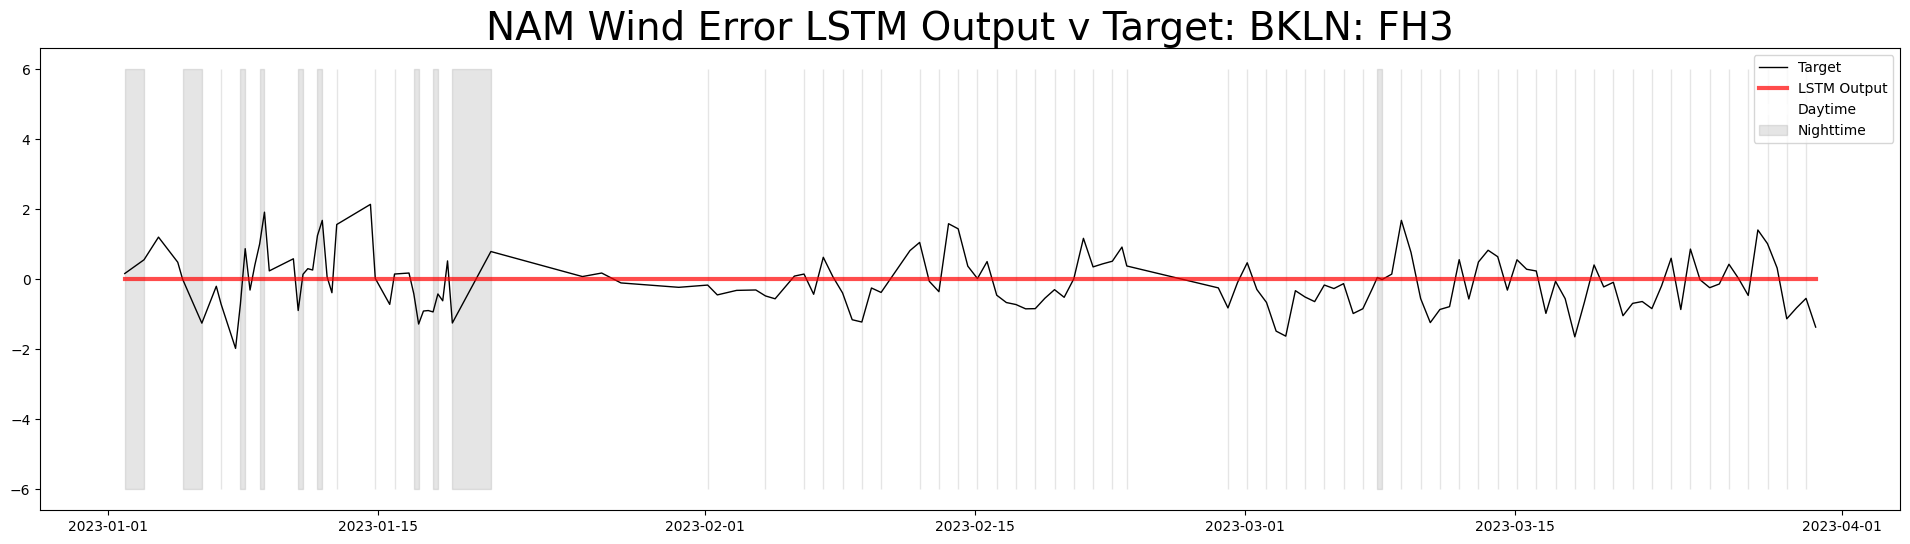

In [295]:
x = ml_output(ldf, full_df, 4, station, test_set_start, test_set_finish, fh)

In [296]:
# mean = st.mean(abs(ldf_quad["diff"]))
# mean

In [297]:
# mean_s = st.mean(ldf_quad["diff"] ** 2)
# mean_s

In [298]:
# x = ml_output(ldf_quad, full_df, 4, station, test_set_start, test_set_finish, fh)

In [299]:
for k in full_df.columns:
    if re.search(
        f"{station}|valid|Model forecast|Abs_err",
        k,
    ):
        continue
    else:
        full_df = full_df.drop(columns=[k])

In [300]:
# test_len = int(len(full_df['valid_time'])*0.2)
# full_df = full_df.iloc[0:test_len]

In [301]:
def groupby_month(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.month), (df.valid_time.dt.year)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    x = np.arange(1, len(the_list) + 1)
    plt.bar(x, the_list)
    ax.set_xticklabels([2018, 2019, 2020, 2021, 2022, 2023])
    ax.set_xticks(np.arange(1, len(the_list) + 1, int((len(the_list) + 1) / 6)))
    return the_list

In [302]:
full_df.head()

,valid_time_cos_clock,valid_time_sin_clock,valid_time_cos,valid_time_sin,t2m_BKLN,sh2_BKLN,d2m_BKLN,r2_BKLN,u10_BKLN,v10_BKLN,...,relh_BKLN,srad_BKLN,pres_BKLN,mslp_BKLN,wspd_sonic_mean_BKLN,wspd_sonic_BKLN,wmax_sonic_BKLN,wdir_sonic_BKLN,snow_depth_BKLN,precip_total_BKLN
5184,-1.836970e-16,-1.000000e+00,0.985301,0.170830,4.715346,0.002811,-3.945111,53.483235,3.484933,-1.258265,...,58.937481,101.005608,1012.517029,1012.967102,3.852439,3.497539,5.128475,268.030487,-0.001898,0.0
5185,1.000000e+00,0.000000e+00,0.982223,0.187719,3.380902,0.002958,-3.295205,62.024489,1.313702,-1.239089,...,59.454861,0.000000,1014.127991,1014.573547,3.374343,3.752576,5.392201,281.663513,-0.003368,0.0
5186,-1.608123e-16,1.000000e+00,0.982223,0.187719,1.234926,0.002509,-5.665332,61.300151,-0.758227,-2.388232,...,53.730930,0.000000,1016.247986,1016.712769,2.711540,3.537868,5.214347,9.352241,-0.003313,0.0
5187,-1.000000e+00,-3.216245e-16,0.982223,0.187719,-0.208312,0.002460,-5.856225,66.840953,-1.250496,-2.090228,...,56.967300,0.072272,1018.494995,1018.995667,3.204557,3.772202,6.511433,10.447210,-0.004206,0.0
5188,-1.836970e-16,-1.000000e+00,0.982223,0.187719,4.523922,0.002619,-4.892537,50.350210,-2.262154,0.089149,...,50.025471,240.823685,1019.502014,1019.980225,1.887011,1.330090,2.479899,85.596024,0.000238,0.0


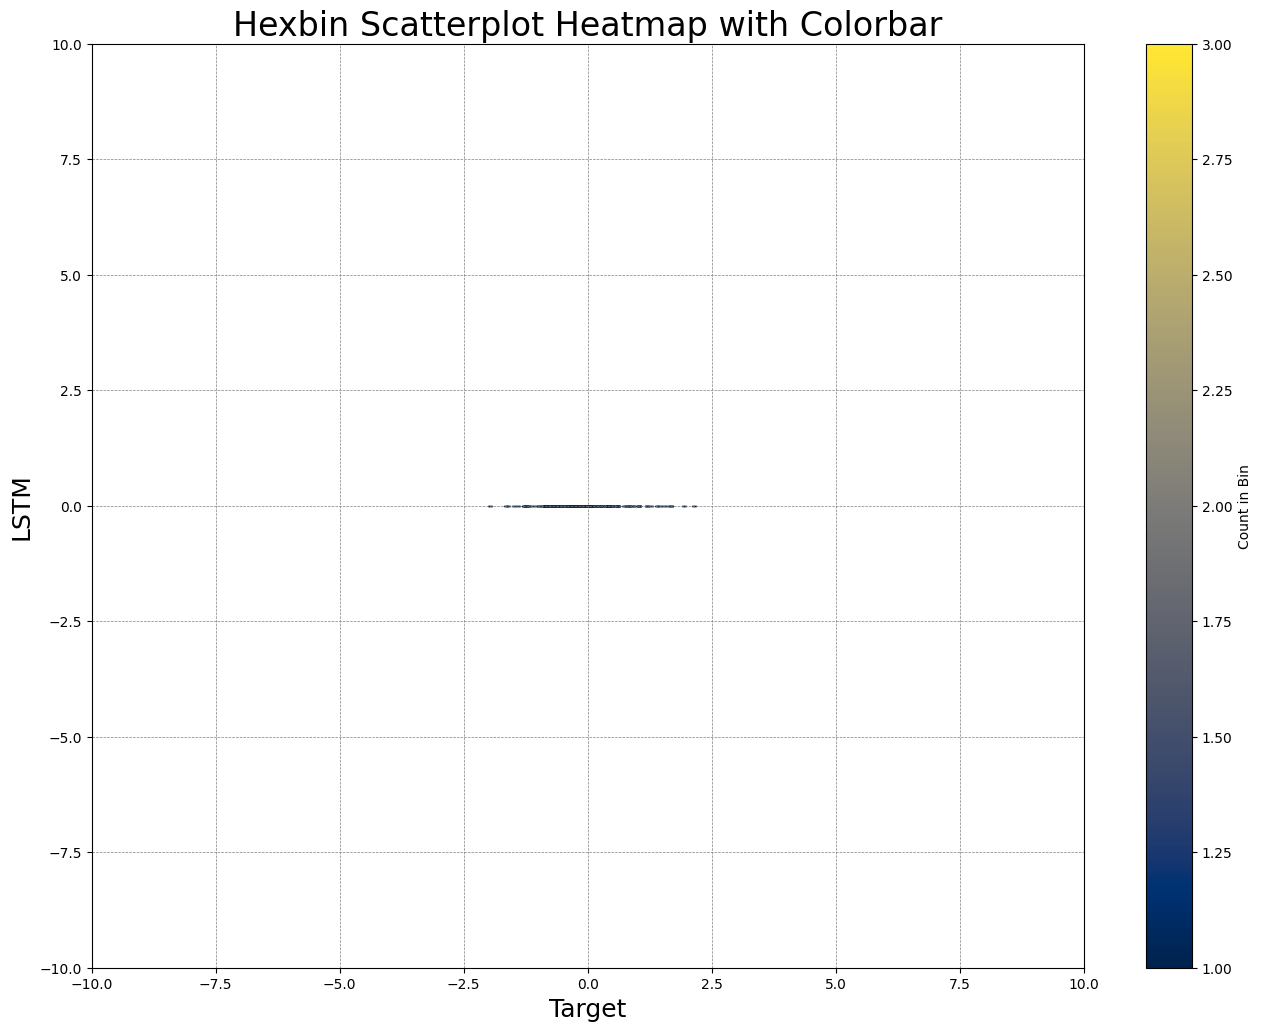

In [303]:
create_hexbin_heatmap(ldf)

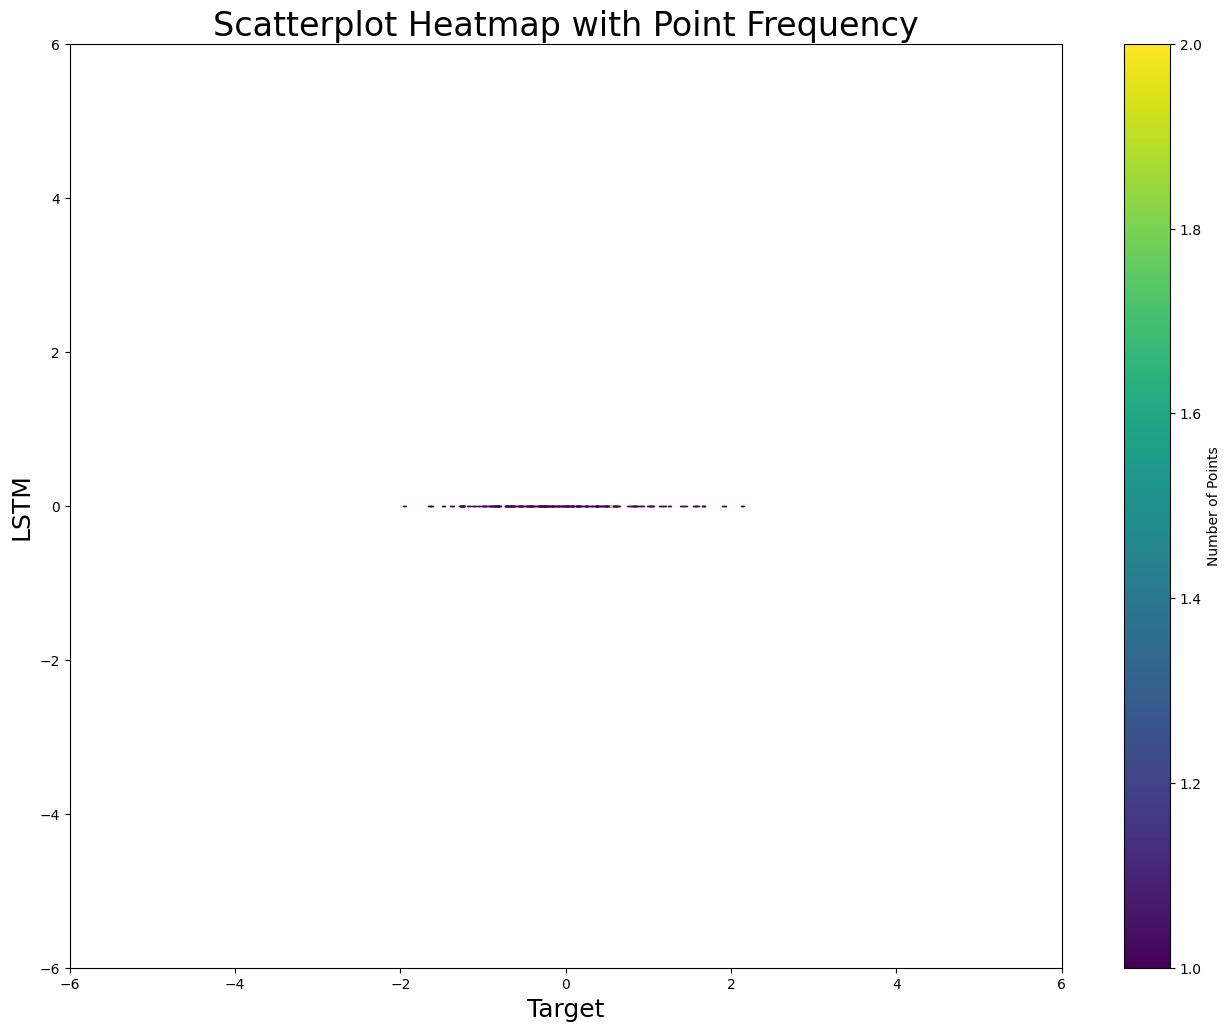

In [304]:
create_scatterplot_heatmap(ldf)

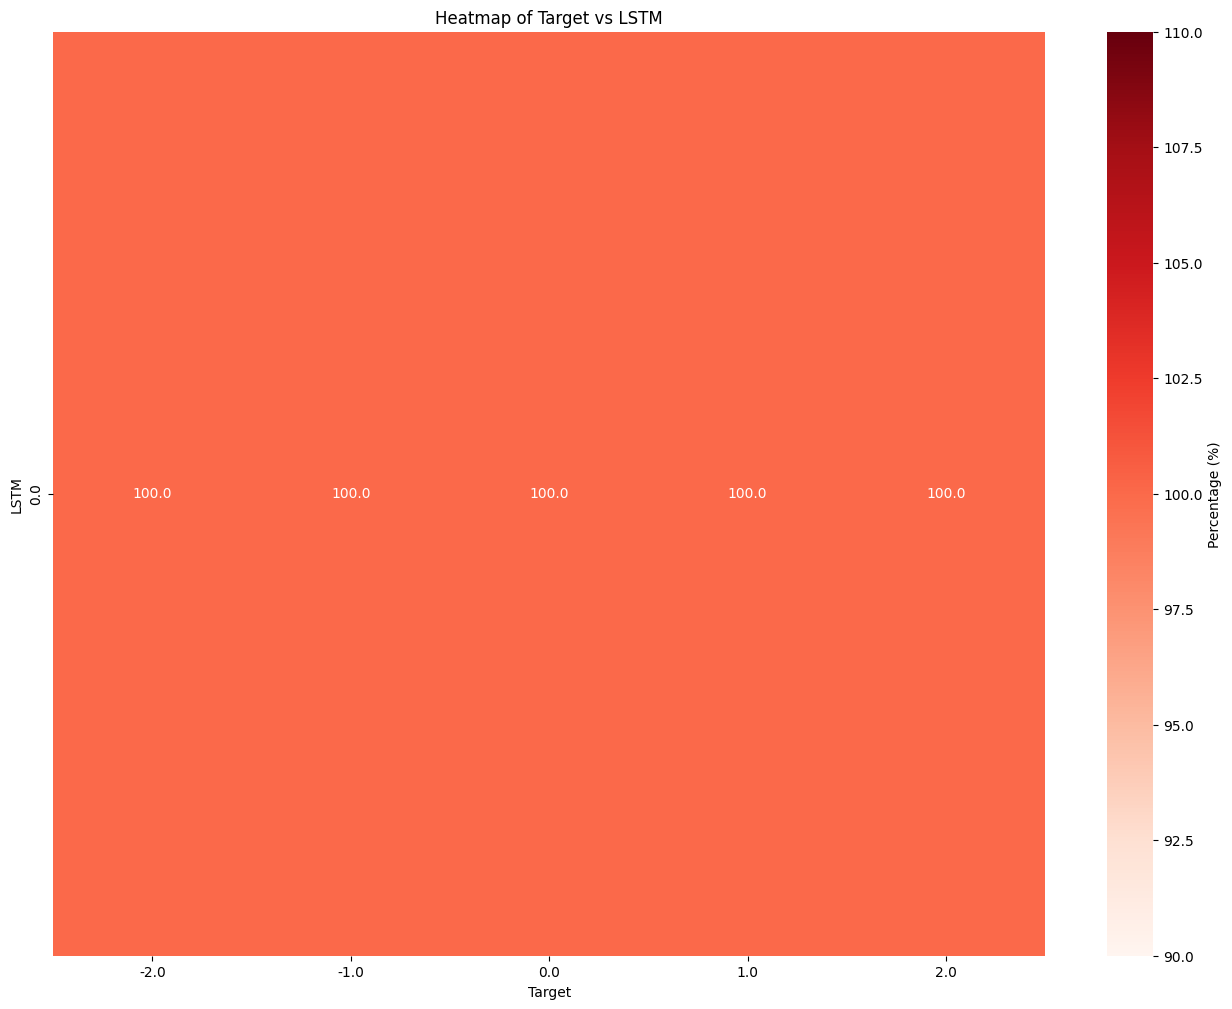

In [305]:
create_heatmap(ldf)

/tmp/tmp.kIoXgixglD/ipykernel_1087713/2351311710.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2018, 2019, 2020, 2021, 2022, 2023])


ZeroDivisionError: division by zero

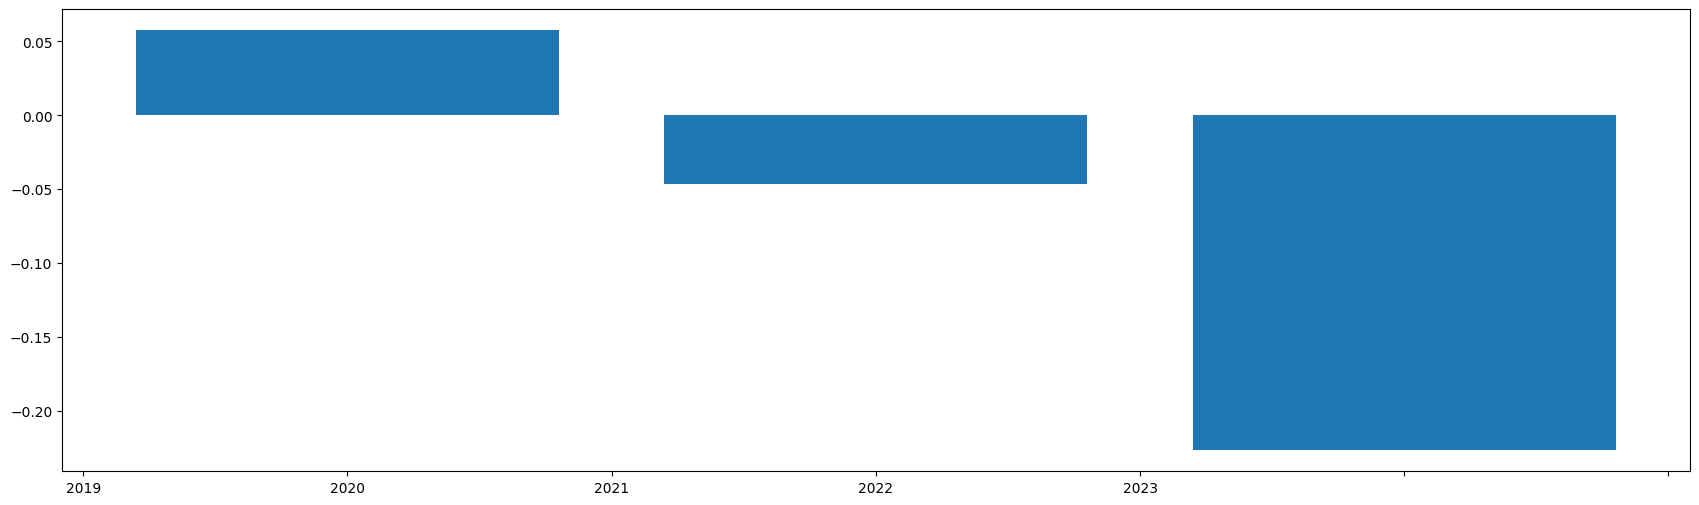

In [306]:
err_by_month = groupby_month(ldf, "diff")
err_by_month

In [ ]:
def groupby_time(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.hour)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    x = np.arange(0, len(the_list))
    plt.bar(x, the_list, color="g")
    return the_list

In [ ]:
err_by_time = groupby_time(ldf, "diff")

In [ ]:
import calendar


def groupby_month_total(df, col):
    df = df[df[col] > -999]
    GB = df.groupby([(df.valid_time.dt.month)])[col].mean()
    the_list = GB.tolist()
    fig, ax = plt.subplots(figsize=(21, 6))
    x = np.arange(0, len(the_list))

    # Get a colormap
    cmap = plt.get_cmap("RdBu")
    # Normalize your data to map to the colormap
    norm = plt.Normalize(min(the_list), max(the_list))
    colors = cmap(norm(the_list))

    # Create a bar chart
    plt.bar(x, the_list, color=colors)
    ax.set_xticks(x)  # Set x-ticks to be at the positions of the months
    month_labels = [calendar.month_name[month] for month in GB.index]
    ax.set_xticklabels(month_labels)  # Label x-ticks with month numbers

    plt.show()
    return the_list

In [ ]:
groupby_month_total(ldf, "diff")

In [ ]:
def myround(x, base):
    return base * round(x / base)

In [ ]:
# function to get unique values
def unique(list1):
    # initialize a null list
    unique_list = []

    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [ ]:
def err_bucket(full_df, met_col, rounded_base):
    temps = []
    for i, _ in enumerate(full_df[met_col]):
        rounded = myround(full_df[met_col].iloc[i], rounded_base)
        temps.append(rounded)

    unique_temps = unique(temps)

    zeros = np.zeros(len(unique_temps))
    rs = np.resize(zeros, (len(unique_temps), len(unique_temps)))

    temp_df = pd.DataFrame(
        data=rs, index=[np.arange(len(unique_temps))], columns=sorted(unique_temps)
    )

    for i, _ in enumerate(full_df[met_col]):
        rounded = myround(full_df[met_col].iloc[i], rounded_base)
        err = full_df["Abs_err"].iloc[i]
        temp_df[rounded].iloc[0] = abs(err) + abs(temp_df[rounded].iloc[0])
        temp_df[rounded].iloc[-1] += 1

    instances = temp_df.iloc[-1]
    temp_df = temp_df.iloc[0]

    return temp_df, instances

In [ ]:
def plot_buckets(temp_df, instances, var_name, cmap, width):
    my_cmap = plt.get_cmap(cmap)
    averages = temp_df / instances
    y = averages
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
    the_list = averages.tolist()
    fig, ax = plt.subplots(
        figsize=(21, 6), facecolor="slategrey", constrained_layout=True
    )
    bars = plt.bar(temp_df.keys(), the_list, color=my_cmap(rescale(y)), width=width)
    ax.set_title("Absolute Error of LSTM", fontsize=28, c="white")
    ax.set_xlabel(var_name, fontsize=18, c="white")
    ax.set_ylabel("Mean Absolute Error", fontsize=18, c="white")
    # Iterating over the bars one-by-one
    # Annotate each bar with its value
    # Annotate each bar with the number of instances
    for bar, value, instance_count in zip(bars, the_list, instances):
        yval = value + 0.01  # Adjust the vertical position of the label
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            f"n={instance_count}",
            ha="center",
            va="bottom",
            color="black",
            fontsize=12,
            rotation=90,
        )

In [ ]:
# for k in full_df.keys():
#     print(k)

In [ ]:
# diector = sorted(os.listdir('/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20231129/'))

# for d in diector:
#         full_df = pd.read_parquet(
#         f"/home/aevans/nwp_bias/src/machine_learning/data/lstm_eval_csvs/20231129/{d}"
#     )
#         for k in full_df.columns:
#             if re.search(
#                 f"{station}",
#                 k,
#             ):
#                 print("Succes!!")
#                 print(d)
#             else:
#                 continue

In [ ]:
# Reset index for both DataFrames to ensure alignment
full_df = full_df.reset_index(drop=True)
ldf = ldf.reset_index(drop=True)
full_df["Abs_err"] = ldf["diff"]

In [ ]:
full_df.dropna(inplace=True)

In [ ]:
temp_df, instances = err_bucket(full_df, f"tair_{station}", 2)

In [ ]:
instances

In [ ]:
plot_buckets(temp_df, instances, "Temperature (C)", "Wistia", 2.5)

In [ ]:
relh_df, instances = err_bucket(full_df, f"relh_{station}", 2)

In [ ]:
plot_buckets(relh_df, instances, "Relative Humidity (%)", "copper", 5.0)

In [ ]:
new_df, instances = err_bucket(full_df, f"srad_{station}", 40)

In [ ]:
plot_buckets(new_df, instances, "Solar Radiation (W / m*m)", "copper", 50.0)

In [ ]:
pres_df, instances = err_bucket(full_df, f"pres_{station}", 2)

In [ ]:
print(f'The mean pressure at {station} is {full_df[f"pres_{station}"].mean()}')

In [ ]:
plot_buckets(pres_df, instances, "Surface Pressure (mb)", "copper", 1.5)

In [ ]:
def round_small(full_df, met_col, rounded_base):
    temps = []
    for i, _ in enumerate(full_df[met_col]):
        if full_df[met_col].iloc[i] < 1.0 and full_df[met_col].iloc[i] >= 0:
            rounded = round(full_df[met_col].iloc[i], rounded_base)
            temps.append(rounded)
        else:
            rounded = myround(full_df[met_col].iloc[i], 1)
            temps.append(rounded)

    unique_temps = unique(temps)

    zeros = np.zeros(len(unique_temps))
    rs = np.resize(zeros, (len(unique_temps), len(unique_temps)))
    temp_df = pd.DataFrame(
        data=rs, index=[np.arange(len(unique_temps))], columns=sorted(unique_temps)
    )

    for i, _ in enumerate(full_df[met_col]):
        if full_df[met_col].iloc[i] < 1.0 and full_df[met_col].iloc[i] >= 0:
            rounded = round(full_df[met_col].iloc[i], rounded_base)
        else:
            rounded = float(myround(full_df[met_col].iloc[i], base=1))
        err = float(full_df["Abs_err"].iloc[i])
        temp_df[rounded].iloc[0] = abs(err) + abs(temp_df[rounded].iloc[0])
        temp_df[rounded].iloc[-1] += 1

    instances = temp_df.iloc[-1]
    temp_df = temp_df.iloc[0]
    temp_df = temp_df.loc[~(temp_df == 0)]
    instances = instances.loc[~(instances == 0)]
    return temp_df, instances

In [ ]:
rain_df, instances = err_bucket(full_df, f"precip_total_{station}", 0.1)

In [ ]:
plot_buckets(rain_df, instances, "Precipitation [mm/hr]", "winter", 0.1)

In [ ]:
snow_df, instances = round_small(full_df, f"snow_depth_{station}", 2)

In [ ]:
snow_df = snow_df.iloc[1:]
instances = instances.iloc[1:]

In [ ]:
plot_buckets(snow_df, instances, "Accumulated Snow (m)", "cool", 0.01)

In [ ]:
wmax, instances = err_bucket(full_df, f"wmax_sonic_{station}", 2)

In [ ]:
plot_buckets(wmax, instances, "Wind Max (m/s)", "copper", 1.0)

In [ ]:
wdir, instances = err_bucket(full_df, f"wdir_sonic_{station}", 45)

In [ ]:
plot_buckets(wdir, instances, "Wind Dir (degrees)", "copper", 10.0)